In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
file_path = os.path.join("data","KDDTest+.csv")
pipeline_path = os.path.join("preprocessing_pipeline","pipeline.pkl")
attack_label_encoder_path = os.path.join("preprocessing_pipeline","attack_label_encoder.pkl")

# Checking csv data after conversion and preprocessing models too

In [4]:
df = pd.read_csv(file_path)
print(f"Total data: {df.value_counts().sum()}")
df.head()

Total data: 22475


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,229,...,255,10,0.04,0.06,0.00,0.0,0.0,1.00,1.00,DoS
1,0,tcp,private,REJ,0,0,0,0,0,136,...,255,1,0.00,0.06,0.00,0.0,0.0,1.00,1.00,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,1,...,134,86,0.61,0.04,0.61,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,1,...,3,57,1.00,0.00,1.00,0.0,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,1,...,29,86,0.31,0.17,0.03,0.0,0.0,0.83,0.71,Other


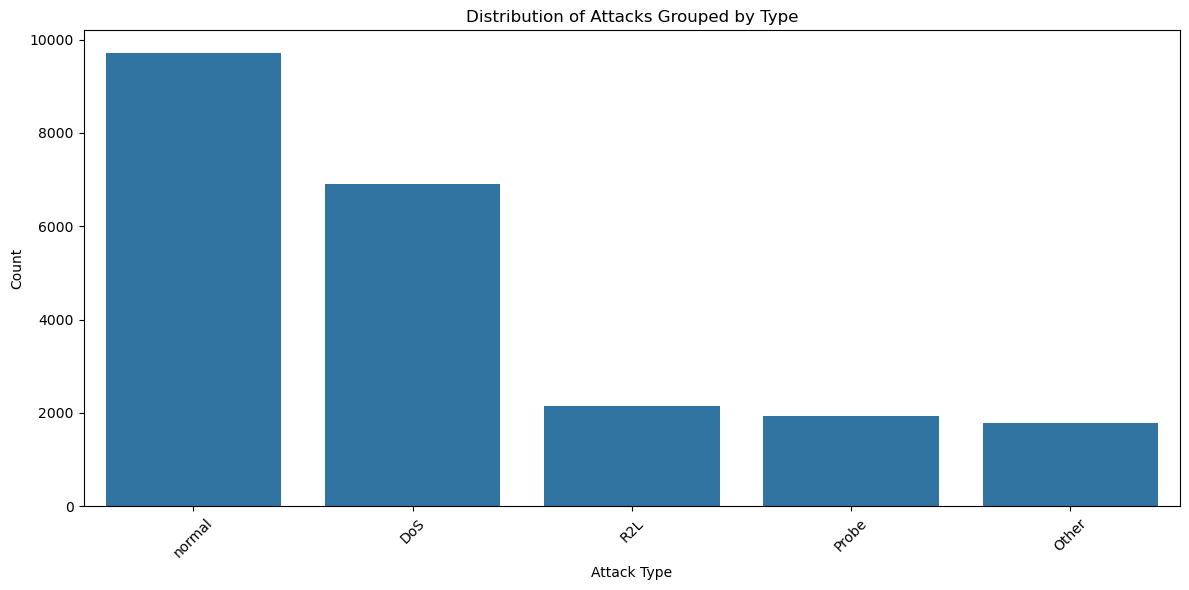

In [5]:

# Plot the updated distribution of grouped attacks
plt.figure(figsize=(12, 6))  # Adjusting the figure size to make it wider
sns.countplot(x='attack', data=df, order=df['attack'].value_counts().index)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title('Distribution of Attacks Grouped by Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()  # Ensure everything fits in the plot
plt.show()


In [6]:
pipeline = joblib.load(pipeline_path)

# Print the pipeline structure
print("\nPreprocessing Pipeline Steps:")
pipeline


Preprocessing Pipeline Steps:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', StandardScaler(),
                                                  Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'duration',
       'land', 'rerror_rate', 'same_srv_rate', 'serror_rate', 'src_bytes',
       'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate',
       'urgent', 'wrong_fragment'],
      dtype='object'))])),
                ('pca', PCA(n_components=0.95, random_state=42))])

In [7]:
attack_label_encoder = joblib.load(attack_label_encoder_path)

le_name_mapping = dict(zip(attack_label_encoder.classes_, attack_label_encoder.transform(attack_label_encoder.classes_)))
print(le_name_mapping)

{'DoS': 0, 'Other': 1, 'Probe': 2, 'R2L': 3, 'normal': 4}


In [8]:

processed_data = pipeline.transform(df)
print("\nTransformed Data (Shape):")
print(processed_data.shape)

# Optionally, convert to a DataFrame for easier inspection
processed_df = pd.DataFrame(processed_data)
processed_df.head()


Transformed Data (Shape):
(22475, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.202617,5.723922,0.471198,-1.897486,0.811144,-0.051033,-0.707529,0.046086,-0.104613,-0.258992,0.421902,-0.031818,0.776779,-0.458470,0.211269,0.555969
1,1.096048,5.703740,-0.012626,-1.854503,0.608921,0.060636,-0.751123,0.044816,-0.099046,-0.252936,0.350636,-0.019766,1.042168,-0.572875,0.109263,0.158987
2,-1.672870,-0.386606,-0.443665,1.086627,-0.025495,0.089449,0.020612,0.017427,0.009290,-0.175923,-0.180362,1.085590,0.935983,-0.533554,-0.075369,0.327812
3,-2.925202,-0.670401,-1.169938,2.669086,2.466172,-1.762543,-0.222667,-0.025365,-0.007740,-0.905979,1.426571,-0.613842,0.122959,-0.484251,-0.201576,-0.134910
4,-1.323081,3.740622,-1.856626,-0.608986,1.637518,-0.839930,-0.719132,0.019976,-0.081336,-0.601749,1.059407,-0.871653,-0.036846,1.058259,0.704682,-1.012225
